In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog, Tk
import string

In [11]:
def main():
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    root.destroy()

    base_path, file_name = os.path.split(file_path)
    plot_output = os.path.join(base_path, 'plots')
    os.makedirs(plot_output, exist_ok=True)

    xls_raw = pd.ExcelFile(file_path)
    roi_type = {'feature1': 'cell body', 'feature2': 'axon', 'feature3': 'background'}

    for sheet_name in xls_raw.sheet_names:
        full_df = process_sheet(xls_raw, sheet_name)
        pivot_df = create_pivot_table(full_df)
        save_pivot_df(pivot_df, base_path, file_name, sheet_name)
        plot_data(pivot_df, roi_type, sheet_name, plot_output)

In [12]:
def process_sheet(xls_raw, sheet_name):
    df = pd.read_excel(xls_raw, sheet_name=sheet_name)
    df['mod Image name'] = df['Image name'].str[:6] + df['Image name'].str.extract(r'slice(.*?)$')[0]
    df['mod Image name'] = df['mod Image name'].str.rstrip('.oir').str.rstrip(string.digits).str.rstrip('_')
    return df

In [13]:
def create_pivot_table(df):
    pivot_df = df.pivot_table(index=['mod Image name', 'Image feature', 'ROI #'], columns='Timepoint', values='Gray value average', fill_value=0)
    return pivot_df.reset_index().replace(0, np.nan)

In [14]:
def save_pivot_df(pivot_df, base_path, file_name, sheet_name):
    pivot_filename = file_name.rstrip('.xlsx') + sheet_name + ('_.xlsx')
    pivot_output_path = os.path.join(base_path, 'plots', pivot_filename)
    pivot_df.to_excel(pivot_output_path, index=True)
    print(f'DataFrame saved as: {pivot_output_path}')

In [15]:
def plot_data(pivot_df, roi_type, sheet_name, plot_output):
    feature_dfs = {}
    fig, axes = plt.subplots(1, 3, figsize=(10, 6))

    # Determine the global maximum y-value and background range
    max_y_value = 0
    background_range = [float('inf'), float('-inf')]

    for feature in roi_type.values():
        df = pivot_df[pivot_df['Image feature'].str.contains(feature)][['DMSO quench', 'post stain']]
        max_y_value = max(max_y_value, df.max().max())
        if feature == 'background':
            background_min = df.min().min()
            background_max = df.max().max()
            background_range = [min(background_range[0], background_min), max(background_range[1], background_max)]

    # Adjust the max_y_value and background range
    max_y_value *= 1.1
    background_range[1] *= 1.1  # Scale the max value of the background range similarly

    for n, (key, feature) in enumerate(roi_type.items()):
        df = pivot_df[pivot_df['Image feature'].str.contains(feature)][['mod Image name', 'ROI #', 'DMSO quench', 'post stain']]
        feature_dfs[feature] = df
        plot_roi_type(df, axes[n], sheet_name, feature, max_y_value, background_range if feature != 'background' else None, roi_type)

    fig.tight_layout()
    fig_output_path = os.path.join(plot_output, sheet_name + '.png')
    plt.savefig(fig_output_path, dpi=300, bbox_inches='tight')
    plt.show()

In [18]:
def plot_roi_type(df, ax, sheet_name, feature, max_y_value, background_range, roi_type):
    df_stats = df.describe()

    conditions = ['DMSO quench', 'post stain']
    condition_positions = [0, 1]  # x-coordinates for each condition

    for i in range(len(df)):
        data_points = [df[condition].iloc[i] for condition in conditions]
        ax.plot(condition_positions, data_points, linewidth=1, c='xkcd:grey')  # Connecting lines
        for pos, point in zip(condition_positions, data_points):
            ax.scatter(pos, point, s=40, facecolors='none', edgecolors='xkcd:grey')

    for pos, condition in zip(condition_positions, conditions):
        mean = df_stats.loc['mean', condition]
        std = df_stats.loc['std', condition]
        ax.errorbar(pos, mean, yerr=std, fmt='.', linewidth=0.5, c='xkcd:red pink', label='Mean +/- SD' if pos == 0 else None)
        ax.text(pos, mean, f'{mean:.2f}', ha='center', va='bottom', c='xkcd:red pink', fontsize=8)

    plot_title = f'{sheet_name} {feature}'
    ax.set_title(plot_title)
    ax.set_ylabel('Fluorescence intensity, a.u.')
    ax.set_xlim([-0.5, 1.5])
    ax.set_xticks(condition_positions)
    ax.set_xticklabels(conditions, rotation=45, ha='right')
    ax.set_ylim([0, max_y_value])
    ax.legend(fontsize=8)

    # background bar
    if background_range and feature != 'background':
        ax.fill_between([-0.5, 2.5], background_range[0], background_range[1], color='lightgrey', alpha=0.5)
        label_x = 2.5
        label_y = background_range[0] - 0.01 * (max_y_value - background_range[0])
        ax.text(label_x, label_y, 'Background range', verticalalignment='top', horizontalalignment='right', color='grey', fontsize=8)

DataFrame saved as: C:/Users/holly.myers/OneDrive - Allen Institute/Microsoft Teams Chat Files/Desktop/Antibody validation/GFP antibody validation 7.11.24/test 2\plots\2_GFP antibody validation experimental slices 7.11.24ab315129_.xlsx


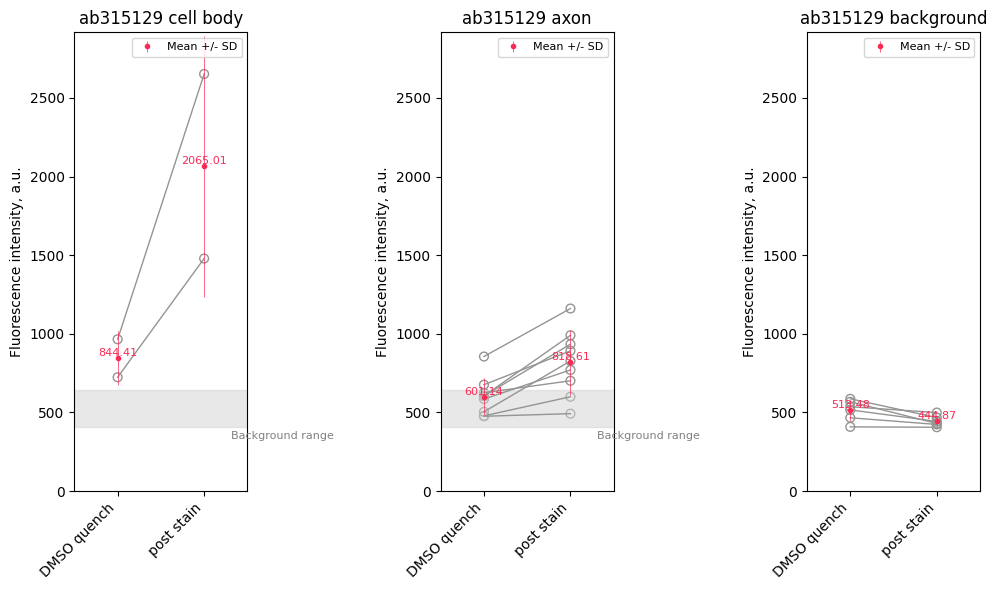

posx and posy should be finite values
posx and posy should be finite values


DataFrame saved as: C:/Users/holly.myers/OneDrive - Allen Institute/Microsoft Teams Chat Files/Desktop/Antibody validation/GFP antibody validation 7.11.24/test 2\plots\2_GFP antibody validation experimental slices 7.11.24ab315128_.xlsx


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


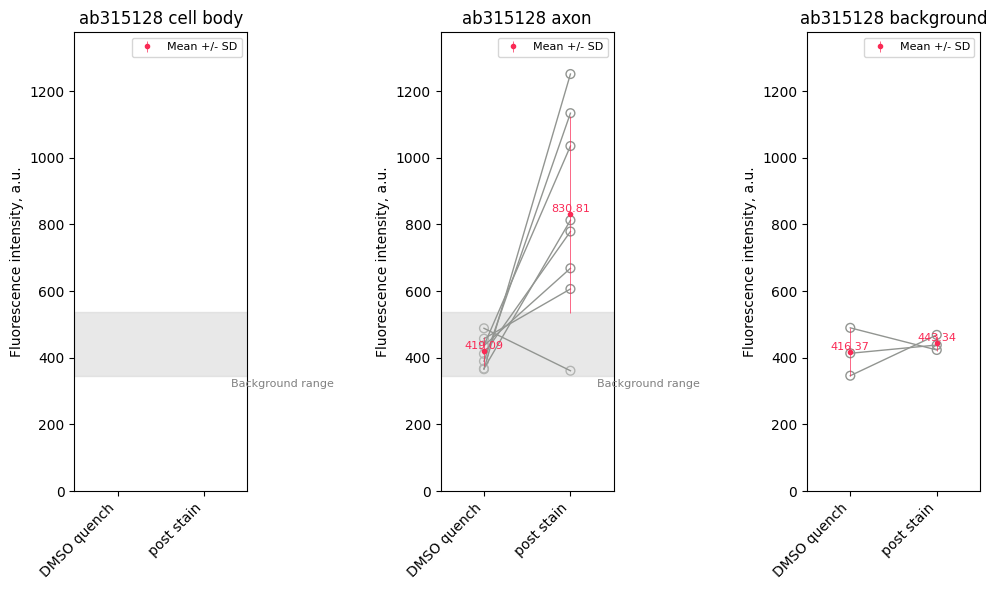

DataFrame saved as: C:/Users/holly.myers/OneDrive - Allen Institute/Microsoft Teams Chat Files/Desktop/Antibody validation/GFP antibody validation 7.11.24/test 2\plots\2_GFP antibody validation experimental slices 7.11.24ab220802_.xlsx


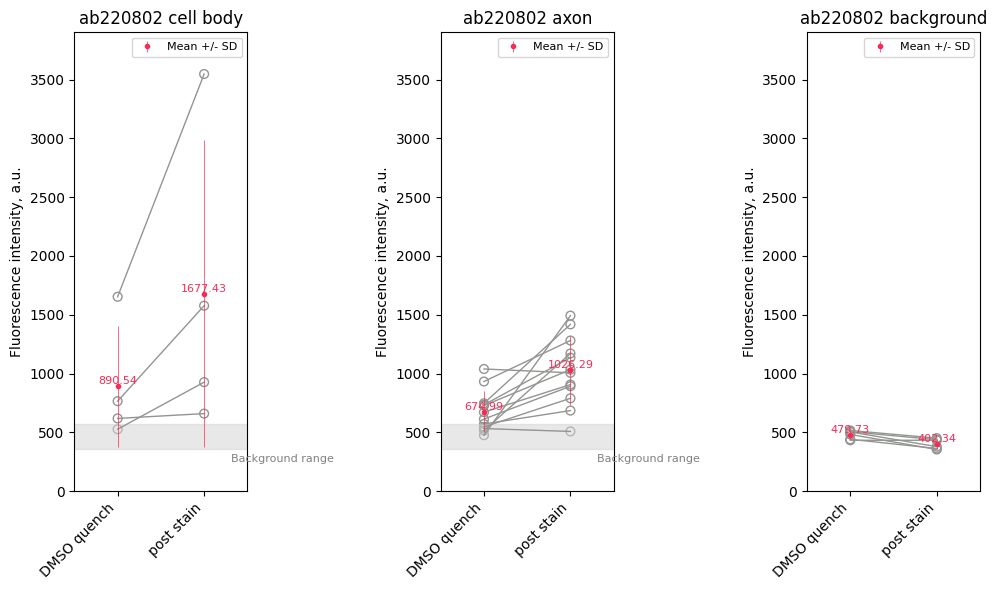

DataFrame saved as: C:/Users/holly.myers/OneDrive - Allen Institute/Microsoft Teams Chat Files/Desktop/Antibody validation/GFP antibody validation 7.11.24/test 2\plots\2_GFP antibody validation experimental slices 7.11.24ab236117_.xlsx


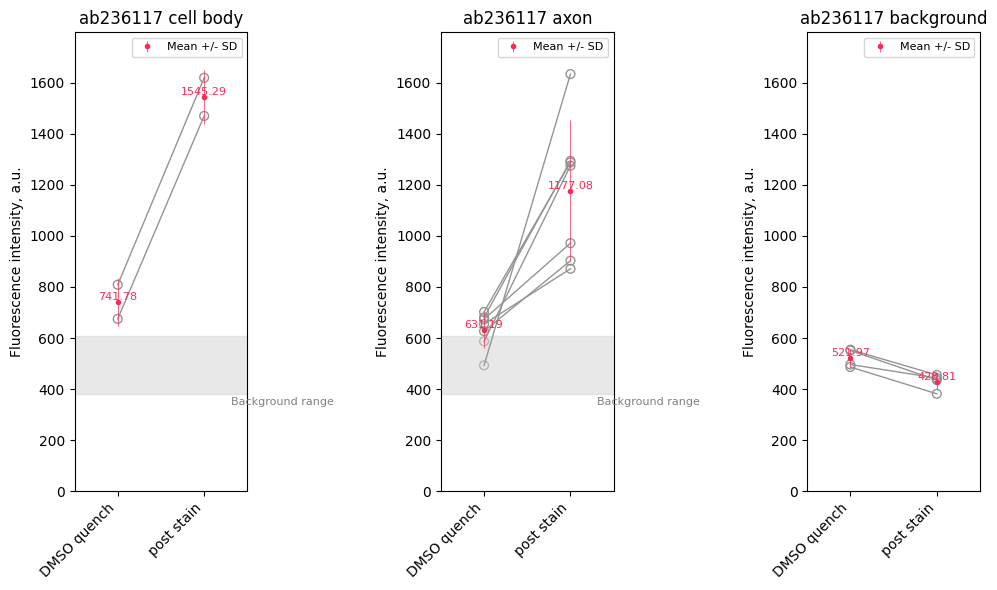

DataFrame saved as: C:/Users/holly.myers/OneDrive - Allen Institute/Microsoft Teams Chat Files/Desktop/Antibody validation/GFP antibody validation 7.11.24/test 2\plots\2_GFP antibody validation experimental slices 7.11.24ab239807_.xlsx


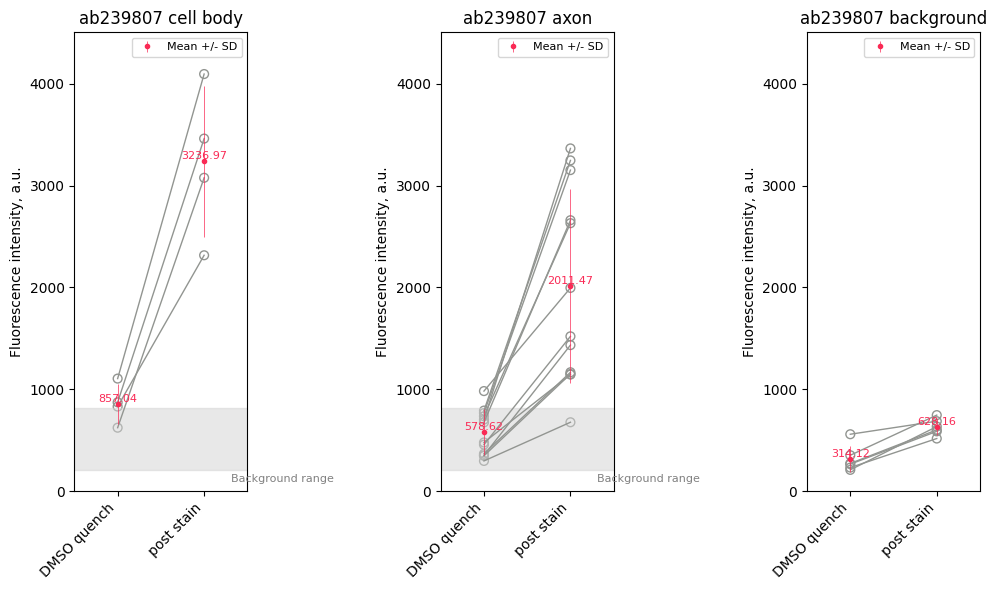

DataFrame saved as: C:/Users/holly.myers/OneDrive - Allen Institute/Microsoft Teams Chat Files/Desktop/Antibody validation/GFP antibody validation 7.11.24/test 2\plots\2_GFP antibody validation experimental slices 7.11.24ab314657_.xlsx


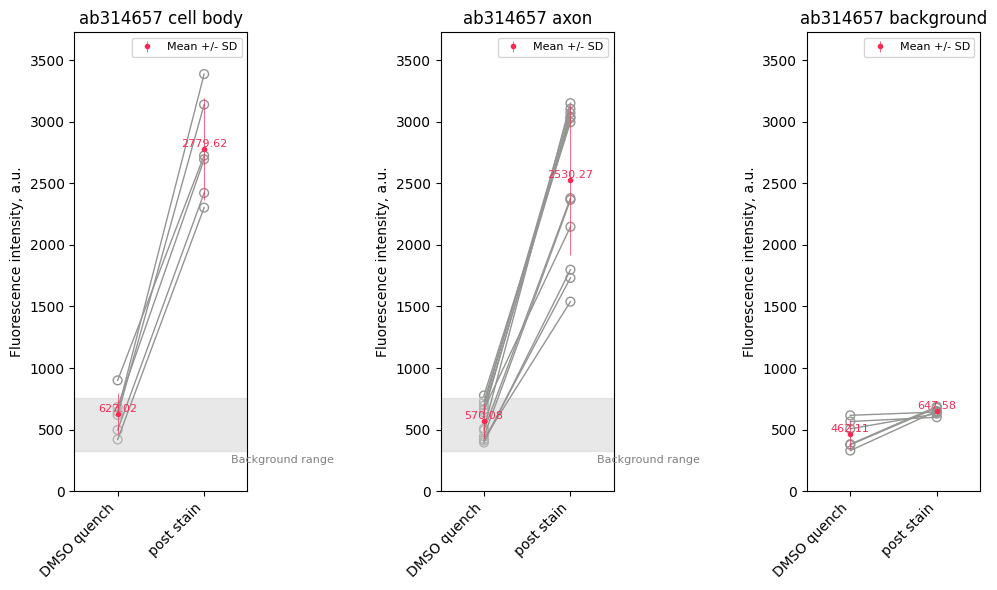

In [19]:
if __name__ == '__main__':
    main()